In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from model import ScatteringNetwork
from utils import MakeDataset

In [2]:
ScatNet = ScatteringNetwork()

In [3]:
path1 = "D:/Cross_Fingerprint_Images_Database/processed_contactless_2d_fingerprint_images/first_session/p10/p1.bmp"
img1 = cv2.imread(path1)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
orig_img1 = torch.reshape(torch.from_numpy(img1), (1,1) + img1.shape)

path2 = "D:/Cross_Fingerprint_Images_Database/processed_contactless_2d_fingerprint_images/first_session/p10/p3.bmp"
img2 = cv2.imread(path2)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
orig_img2 = torch.reshape(torch.from_numpy(img2), (1,1) + img2.shape)

In [4]:
img1 = torch.flatten(ScatNet(orig_img1))
img2 = torch.flatten(ScatNet(orig_img2))

dist = torch.norm(img1 - img2)
print(dist)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional_tensor.py:530: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Copy.cpp:250.)
  img = img.to(req_dtype)


tensor(227.6875)


In [5]:
orig_dist = torch.norm(orig_img1.to(torch.float) - orig_img2.to(torch.float))
print(orig_dist)  

tensor(2316.8225)


In [14]:
dataset = MakeDataset(dataset_type="ieee",mode = "train")
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle = "False")

In [15]:
print(dataset.negative_paths[1])

('D:/Cross_Fingerprint_Images_Database/processed_contactless_2d_fingerprint_images/first_session\\p1\\p1.bmp', 'D:/Cross_Fingerprint_Images_Database/processed_contactless_2d_fingerprint_images/first_session\\p213\\p6.bmp')


In [28]:
pos_orig_means = []
#pos_orig_std = []

neg_orig_means = []
#neg_orig_std = []

pos_scatnet_mean = []
#pos_scatnet_std = []

neg_scatnet_mean = []
#neg_scatnet_std = []

In [29]:
for i, data in enumerate(dataloader):
    (anchor_imgs,pos_imgs, neg_imgs) = data
    (N,H,W) = pos_imgs.shape

    pos_imgs = torch.reshape(pos_imgs,shape=(N,1,H,W)).to(torch.float)
    neg_imgs = torch.reshape(neg_imgs,shape=(N,1,H,W)).to(torch.float)
    anchor_imgs = torch.reshape(anchor_imgs,shape=(N,1,H,W)).to(torch.float)

    pos_orig_means.append(torch.norm(torch.reshape(pos_imgs, (N,H*W)) - torch.reshape(anchor_imgs, (N,H*W))).item())
    #pos_orig_std.append(torch.std(torch.norm(torch.reshape(pos_imgs, (N,H*W)) - torch.reshape(anchor_imgs, (N,H*W)), dim = 0)))
    neg_orig_means.append(torch.norm(torch.reshape(neg_imgs, (N,H*W)) - torch.reshape(anchor_imgs, (N,H*W))).item())
    #neg_orig_std.append(torch.std(torch.norm(torch.reshape(neg_imgs, (N,H*W)) - torch.reshape(anchor_imgs, (N,H*W)), dim = 0)))

    scatnet_pos_imgs = ScatNet(pos_imgs)
    scatnet_neg_imgs = ScatNet(neg_imgs)
    scatnet_anchor_imgs = ScatNet(anchor_imgs)

    pos_scatnet_mean.append(torch.norm(torch.reshape(scatnet_pos_imgs - scatnet_anchor_imgs,shape = (N,-1))).item())    
    #pos_scatnet_std.append(torch.std(torch.norm(torch.reshape(scatnet_pos_imgs - scatnet_anchor_imgs,shape = (N,-1)), dim = 0)))
    neg_scatnet_mean.append(torch.norm(torch.reshape(scatnet_neg_imgs - scatnet_anchor_imgs,shape = (N,-1))).item())
    #neg_scatnet_std.append(torch.std(torch.norm(torch.reshape(scatnet_neg_imgs - scatnet_anchor_imgs,shape = (N,-1)), dim = 0)))   

KeyboardInterrupt: 

In [30]:
pos_scatnet_mean = torch.tensor(pos_scatnet_mean)
#pos_scatnet_std = torch.tensor(pos_scatnet_std)

neg_scatnet_mean = torch.tensor(neg_scatnet_mean)
#neg_scatnet_std = torch.tensor(neg_scatnet_std)

In [32]:
print(torch.mean(pos_scatnet_mean))
print(torch.std(pos_scatnet_mean))
#print(torch.mean(pos_scatnet_std))
print(torch.mean(neg_scatnet_mean))
print(torch.std(neg_scatnet_mean))
#print(torch.mean(neg_scatnet_std))

tensor(377.9398)
tensor(241.5785)
tensor(833.5034)
tensor(294.3488)


In [34]:
pos_orig_means = torch.tensor(pos_orig_means)
neg_orig_means = torch.tensor(neg_orig_means)

In [35]:
print(torch.mean(pos_orig_means))
print(torch.std(pos_orig_means))
print(torch.mean(neg_orig_means))
print(torch.std(neg_orig_means))

tensor(3247.9824)
tensor(1770.9309)
tensor(6614.0688)
tensor(2265.7163)


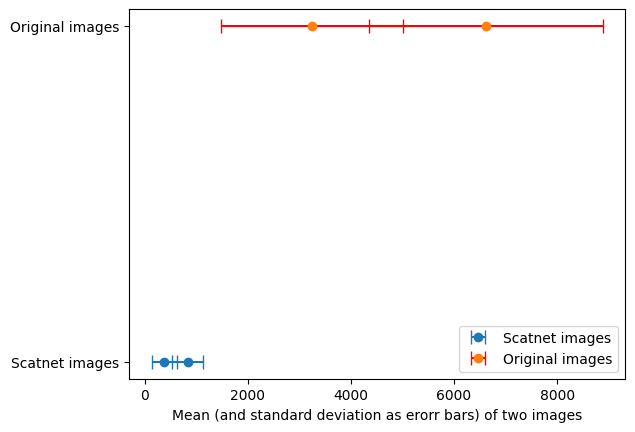

In [51]:
plt.errorbar([torch.mean(pos_scatnet_mean),torch.mean(neg_scatnet_mean)],
             [0,0],
             xerr  = [torch.std(pos_scatnet_mean),torch.std(neg_scatnet_mean)], fmt = 'o', capsize = 5, label = "Scatnet images")
plt.errorbar([torch.mean(pos_orig_means), torch.mean(neg_orig_means)],
             [1,1],
             xerr = [torch.std(pos_orig_means),torch.std(neg_orig_means)], fmt = 'o', capsize = 5, ecolor="red", label = "Original images")
plt.legend()
plt.xlabel("Mean (and standard deviation as erorr bars) of two images")
plt.yticks([0,1],["Scatnet images", "Original images"])
plt.show()

In [33]:
print(len(pos_scatnet_mean))

334
